# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# Loading The Data

In [3]:
df = pd.read_csv('C:\\Users\\91630\\Desktop\\NFLX.csv')

In [4]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,12-02-2018,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,13-02-2018,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,14-02-2018,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,15-02-2018,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,16-02-2018,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


# Preprocessing The Data

In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [7]:
df.shape

(1009, 7)

In [8]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [11]:
split = df['Date'].str.split('-',expand=True)
df['day'] = split[0].astype('int')
df['month'] = split[1].astype('int')
df['year'] = split[2].astype('int')

# Exploratory Data Analysis(EDA)

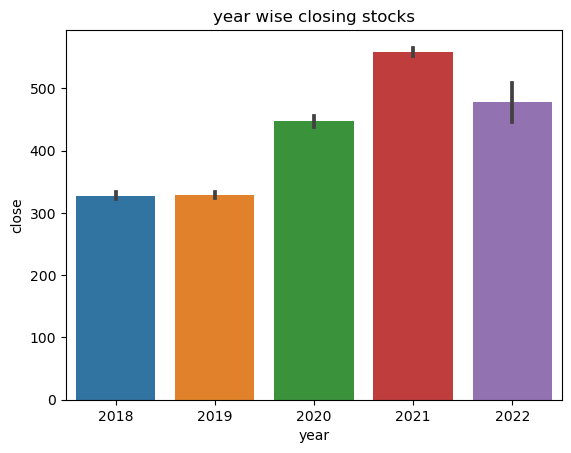

In [12]:
sns.barplot(x = 'year', y = 'Close', data = df)
plt.title('year wise closing stocks')
plt.xlabel('year')
plt.ylabel('close')
plt.show()

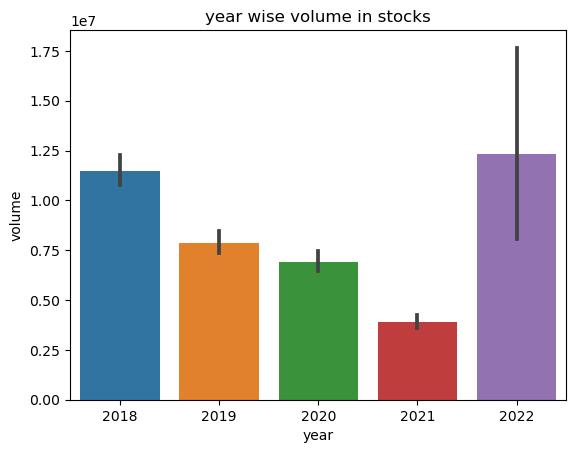

In [13]:
sns.barplot(x = 'year', y = 'Volume', data= df)
plt.title('year wise volume in stocks')
plt.xlabel('year')
plt.ylabel('volume')
plt.show()

In [14]:
df['date'] = pd.to_datetime(df[['year','month','day']])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,date
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018,2018-02-05
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018,2018-02-06
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018,2018-02-07
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018,2018-02-08
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018,2018-02-09


In [15]:
df.drop(columns=['Date'], inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,day,month,year,date
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018,2018-02-05
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018,2018-02-06
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018,2018-02-07
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018,2018-02-08
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018,2018-02-09


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


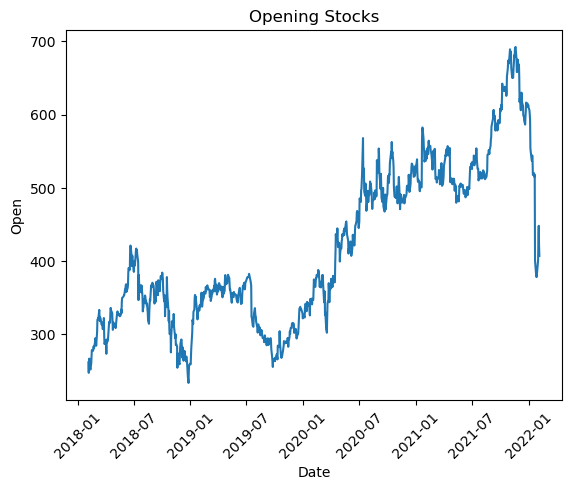

In [16]:
sns.lineplot(x = 'date', y = 'Open', data = df)
plt.xticks(rotation=45)
plt.title('Opening Stocks')
plt.xlabel('Date')
plt.ylabel('Open')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


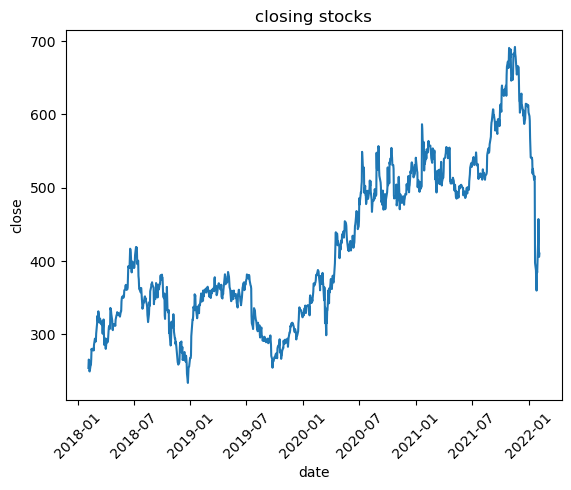

In [17]:
sns.lineplot(x = 'date', y = 'Close', data = df)
plt.xticks(rotation=45)
plt.title('closing stocks')
plt.xlabel('date')
plt.ylabel('close')
plt.show()

In [18]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'day', 'month',
       'year', 'date'],
      dtype='object')

In [19]:
df.drop(columns=['day','month','year','Adj Close','date'], inplace =True)
df.head()

,Open,High,Low,Close,Volume
0,262.000000,267.899994,250.029999,254.259995,11896100
1,247.699997,266.700012,245.000000,265.720001,12595800
2,266.579987,272.450012,264.329987,264.559998,8981500
3,267.079987,267.619995,250.000000,250.100006,9306700
4,253.850006,255.800003,236.110001,249.470001,16906900


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

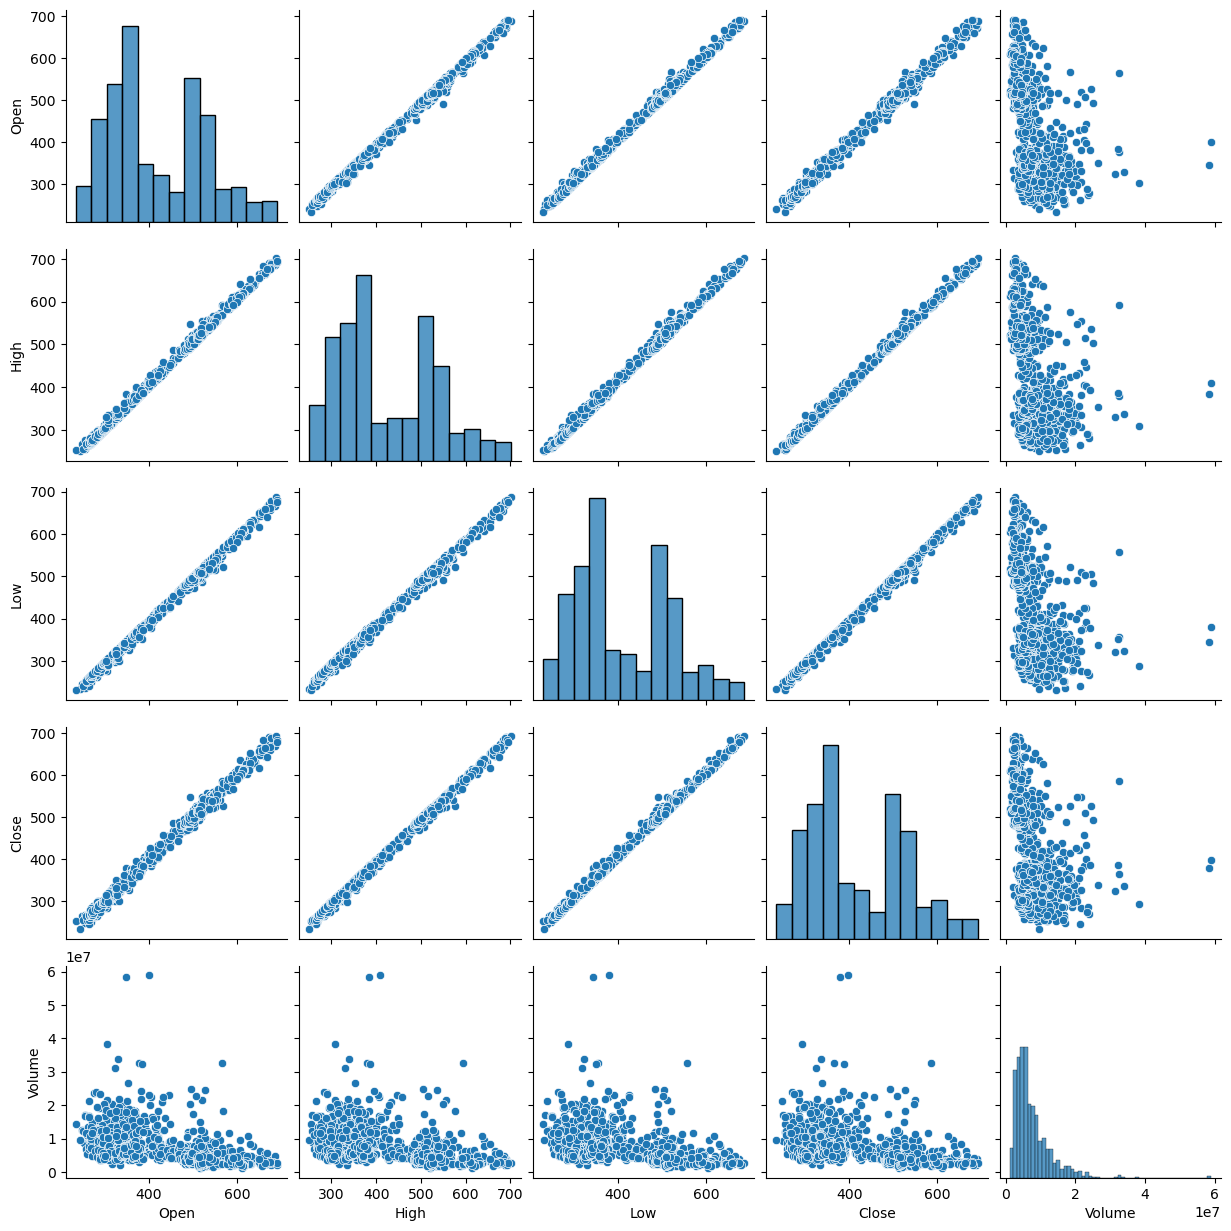

In [20]:
sns.pairplot(df)

In [21]:
correlation = df.corr()
correlation

,Open,High,Low,Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,1.000000


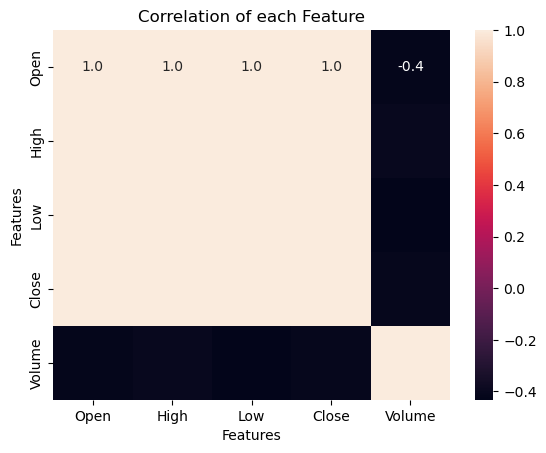

In [22]:
sns.heatmap(correlation, annot = True, fmt='.1f')
plt.title('Correlation of each Feature')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

<Axes: >

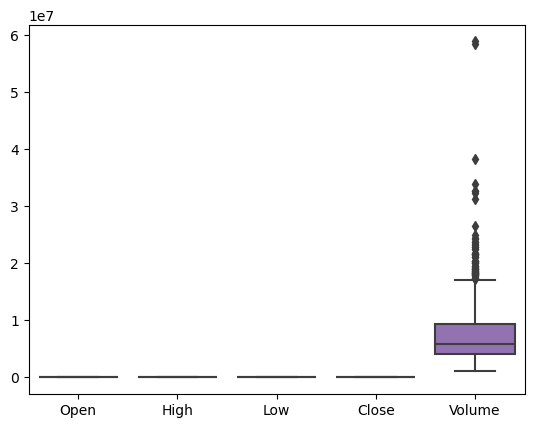

In [23]:
sns.boxplot(df)

# Separating Independent and Dependent Variables

In [24]:
X = df[['Open', 'High', 'Low','Volume']]
y = df['Close']
y.head()

0    254.259995
1    265.720001
2    264.559998
3    250.100006
4    249.470001
Name: Close, dtype: float64

# Splitting the Data into Training and Testing

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
X.shape, X_train.shape, X_test.shape

((1009, 4), (807, 4), (202, 4))

# Scaling the Values to improve the Performance of the model

In [27]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

In [28]:
model1 = LinearRegression()
model1.fit(X_train_scale, y_train)
y_pred1 = model1.predict(X_test_scale)
X_pred1 = model1.predict(X_train_scale)
rmse = np.sqrt(mean_squared_error(y_pred1, y_test))
print('MSE of LinearRegression:', mean_squared_error(y_pred1, y_test))
print('MAE of LinearRegression:', mean_absolute_error(y_pred1, y_test))
print('RMSE of LinearRegression:', rmse)
print('R2_score for testing data:',r2_score(y_pred1, y_test))
print('R2_score for training data:',r2_score(X_pred1, y_train))

MSE of LinearRegression: 15.976946096504593
MAE of LinearRegression: 2.8571865332343855
RMSE of LinearRegression: 3.9971172232628596
R2_score for testing data: 0.9986203720409034
R2_score for training data: 0.998733701741036


# Before HyperParameter Tuning

In [29]:
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
X_pred2 = model2.predict(X_train)
print('MSE of DecisionTreeRegressor:',mean_squared_error(y_pred2, y_test))
print('MAE of DecisionTreeRegressor:',mean_absolute_error(y_pred2, y_test))
print('R2_score for testing data:',r2_score(y_pred2, y_test))
print('R2_score for training data:',r2_score(X_pred2, y_train))

MSE of DecisionTreeRegressor: 49.895525983319786
MAE of DecisionTreeRegressor: 5.009603084158417
R2_score for testing data: 0.9956515182017879
R2_score for training data: 1.0


In [30]:
model3 = RandomForestRegressor()
model3.fit(X_train_scale, y_train)
y_pred3 = model3.predict(X_test_scale)
X_pred3 = model3.predict(X_train_scale)
print('MSE of RandomForestRegressor:',mean_squared_error(y_pred3, y_test))
print('MAE of RandomForestRegressor:',mean_absolute_error(y_pred3, y_test))
print('R2_score for testing data:',r2_score(y_pred3, y_test))
print('R2_score for training data:',r2_score(X_pred3, y_train))

MSE of RandomForestRegressor: 27.35524538053541
MAE of RandomForestRegressor: 3.7080743874257633
R2_score for testing data: 0.9976302237829896
R2_score for training data: 0.999678582603506


# After Hyperparameter Tuning

In [45]:
param_grid = {'n_estimators': [50, 100, 200, 300], 
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split':[2, 5, 10],
}

In [46]:
grid = GridSearchCV(model3, param_grid, cv=5, n_jobs = -1)
grid.fit(X_train_scale, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=50), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]})

In [47]:
grid.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}

In [48]:
grid.best_score_

0.997454450278968

In [44]:
model3 = RandomForestRegressor(max_depth= None, min_samples_split=2, n_estimators= 50)
model3.fit(X_train_scale, y_train)
y_pred3 = model3.predict(X_test_scale)
print('Best MSE for RandomForestRegressor:',mean_squared_error(y_pred3, y_test))
print('Best MAE for RandomForestRegressor:',mean_absolute_error(y_pred3, y_test))
print('Best R2_score for testing data:',r2_score(y_pred3, y_test))
print('Best R2_score for training data:',r2_score(X_pred3, y_train))

Best MSE for RandomForestRegressor: 27.209365510432416
Best MAE for RandomForestRegressor: 3.705661174158432
Best R2_score for testing data: 0.9976411692314371
Best R2_score for training data: 0.999678582603506


In [55]:
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [56]:
grid2 = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs = -1)
grid2.fit(X_train_scale, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [57]:
grid2.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [58]:
grid2.best_score_

0.996452706486288

In [64]:
model2 = DecisionTreeRegressor(max_depth= 10, min_samples_leaf=2, min_samples_split= 2)
model2.fit(X_train_scale, y_train)
y_pred2 = model2.predict(X_test_scale)
X_pred2 = model2.predict(X_train_scale)
print('Best MSE for DecisionTreeRegressor:',mean_squared_error(y_pred2, y_test))
print('Best MAE for DecisionTreeRegressor:',mean_absolute_error(y_pred2, y_test))
print('Best R2_score for testing data:',r2_score(y_pred2, y_test))
print('Best R2_score for training data:',r2_score(X_pred2, y_train))

Best MSE for DecisionTreeRegressor: 46.50609144842609
Best MAE for DecisionTreeRegressor: 4.78387626978823
Best R2_score for testing data: 0.9959890973062194
Best R2_score for training data: 0.9997214196884293


# Conclusion

        Linear Regressor, RandomForestRegressor, DecisionTreeRegressor are the models used on this project and evalued on MSE, RMSE, MAE, R2 Score and the best r2 score is finally selected The Linear Regression Model as it going to the best minimum error in MSE i.e. MSE is robust to outliers 